In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as  sns 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Read survay 
df=pd.read_excel('C:\\Users\\Nextwo\\Desktop\\Entertainment_event\\Entertainment questionnaire.xlsx')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ID,q1,q2,q3,q4,q5,q6,q7,q8,q9
1,1,2,4,1,4,1,3,1,1,Null
2,2,2,4,1,4,2,2,3,4,4
3,3,1,3,1,2,3,5,1,3,1
4,4,2,4,3,4,1,4,3,2,3


In [4]:
#Rename Columns 
df.rename(columns={'Unnamed: 0':'ID','Unnamed: 1':'Gender','Unnamed: 2':'Age Group','Unnamed: 3':'Marital Status','Unnamed: 4':'Monthly Income Level','Unnamed: 5':'Residential Area','Unnamed: 6':'Satisfaction','Unnamed: 7':'Number of going out per week','Unnamed: 8':'Are you willing to pay to attend an entertainment event','Unnamed: 9':'How much are yo willing to pay for an entrance ticket'},inplace=True)

In [5]:
df.head()

,ID,Gender,Age Group,Marital Status,Monthly Income Level,Residential Area,Satisfaction,Number of going out per week,Are you willing to pay to attend an entertainment event,How much are yo willing to pay for an entrance ticket
0,ID,q1,q2,q3,q4,q5,q6,q7,q8,q9
1,1,2,4,1,4,1,3,1,1,Null
2,2,2,4,1,4,2,2,3,4,4
3,3,1,3,1,2,3,5,1,3,1
4,4,2,4,3,4,1,4,3,2,3


In [6]:
#Check Data Dim
df.shape

(501, 10)

In [7]:
# dropdown first row 
df = df.iloc[1:]

In [8]:
df.shape

(500, 10)

In [9]:
#chick null values 
df.isnull().sum()

ID                                                         0
Gender                                                     0
Age Group                                                  0
Marital Status                                             0
Monthly Income Level                                       0
Residential Area                                           0
Satisfaction                                               0
Number of going out per week                               0
Are you willing to pay to attend an entertainment event    0
How much are yo willing to pay for an entrance ticket      0
dtype: int64

In [10]:
#Decoding labels 
df['Gender']=df['Gender'].replace({1:'Male',2:'Female'})
df['Age Group']=df['Age Group'].replace({1:'18-24',2:'25-30',3:'31-45',4:'46-55',5:'56+'})
df['Marital Status']=df['Marital Status'].replace({1:'Single',2:'Married with no kids',3:'Married with kids',4:'Single with kids'})
df['Monthly Income Level']=df['Monthly Income Level'].replace({1:'<7,000 SAR',2:'7,000-12,000SAR',3:'13,000-20,000SAR',4:'>20,000 SAR'})
df['Residential Area']=df['Residential Area'].replace({1:'North-West of Riyadh',2:'North-Eest of Riyadh',3:'South-West of Riyadh',4:'South-Eest of Riyadh'})
df['Satisfaction']=df['Satisfaction'].replace({1:'5 Stars',2:'4 Stars',3:'3 Stars',4:'2 Stars',5:'1 Star'})
df['Number of going out per week']=df['Number of going out per week'].replace({1:'on weekends',2:'2-3 ' ,3:'3+'})
df['Are you willing to pay to attend an entertainment event']=df['Are you willing to pay to attend an entertainment event'].replace({1:'only attend free events',2:' will attend if the ticket is priced reasonably',3:' will attend if the event is exciting enough'})
df['How much are yo willing to pay for an entrance ticket']=df['How much are yo willing to pay for an entrance ticket'].replace({'Null':'0',1:'<50 SAR',2:'50-100 SAR',3:'101-200SAR',4:'200+ SAR'})


In [11]:
#Drop unrequired data 
df.drop(df.index[df['Are you willing to pay to attend an entertainment event'] == 4], inplace=True)
df.drop(['ID'],axis=1)

,Gender,Age Group,Marital Status,Monthly Income Level,Residential Area,Satisfaction,Number of going out per week,Are you willing to pay to attend an entertainment event,How much are yo willing to pay for an entrance ticket
1,Female,46-55,Single,">20,000 SAR",North-West of Riyadh,3 Stars,on weekends,only attend free events,0
3,Male,31-45,Single,"7,000-12,000SAR",South-West of Riyadh,1 Star,on weekends,will attend if the event is exciting enough,<50 SAR
4,Female,46-55,Married with kids,">20,000 SAR",North-West of Riyadh,2 Stars,3+,will attend if the ticket is priced reasonably,101-200SAR
5,Female,25-30,Married with no kids,">20,000 SAR",South-Eest of Riyadh,3 Stars,on weekends,will attend if the event is exciting enough,101-200SAR
6,Female,56+,Married with kids,">20,000 SAR",North-West of Riyadh,1 Star,3+,will attend if the ticket is priced reasonably,50-100 SAR
...,...,...,...,...,...,...,...,...,...
493,Female,46-55,Married with kids,"7,000-12,000SAR",South-West of Riyadh,2 Stars,2-3,only attend free events,0
494,Female,46-55,Married with kids,"7,000-12,000SAR",South-Eest of Riyadh,4 Stars,3+,will attend if the event is exciting enough,101-200SAR
496,Female,31-45,Married with no kids,"13,000-20,000SAR",South-Eest of Riyadh,2 Stars,2-3,only attend free events,0
497,Male,18-24,Married with kids,"<7,000 SAR",South-Eest of Riyadh,1 Star,on weekends,only attend free events,0


In [12]:
# check data type 
df.dtypes

ID                                                         object
Gender                                                     object
Age Group                                                  object
Marital Status                                             object
Monthly Income Level                                       object
Residential Area                                           object
Satisfaction                                               object
Number of going out per week                               object
Are you willing to pay to attend an entertainment event    object
How much are yo willing to pay for an entrance ticket      object
dtype: object

In [13]:
df.shape

(407, 10)

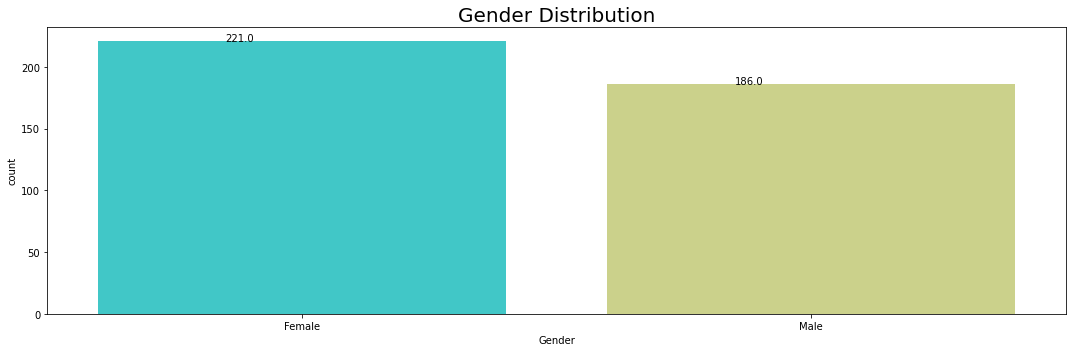

In [14]:
#check Distribution 
plt.rcParams["figure.figsize"] = [15,5]
plt.rcParams["figure.autolayout"] = True
ax=sns.countplot(x='Gender',data=df,palette="rainbow")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Gender Distribution', fontsize=20)

plt.show()

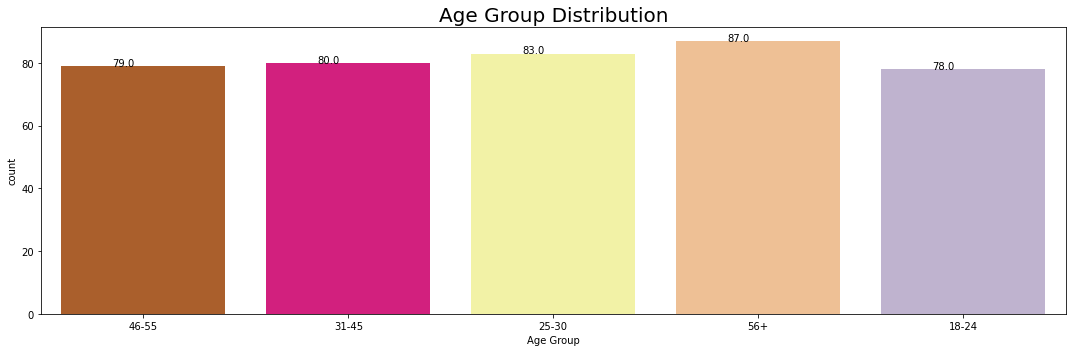

In [15]:
#check Distribution 
plt.figure(figsize=(15,5))
plt.rcParams["figure.autolayout"] = True
ax=sns.countplot(x='Age Group',data=df,palette="Accent_r")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Age Group Distribution', fontsize=20)

plt.show()

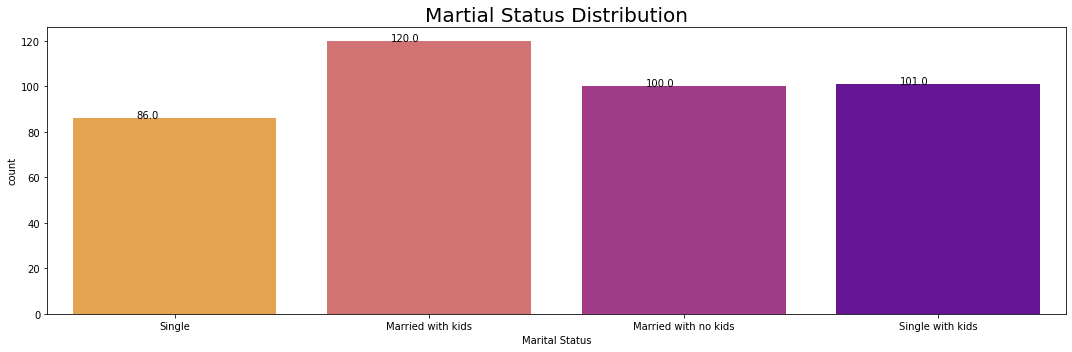

In [16]:
#check Distribution 
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Marital Status',data=df,palette="plasma_r")
ax.set_title('Martial Status Distribution', fontsize=20)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

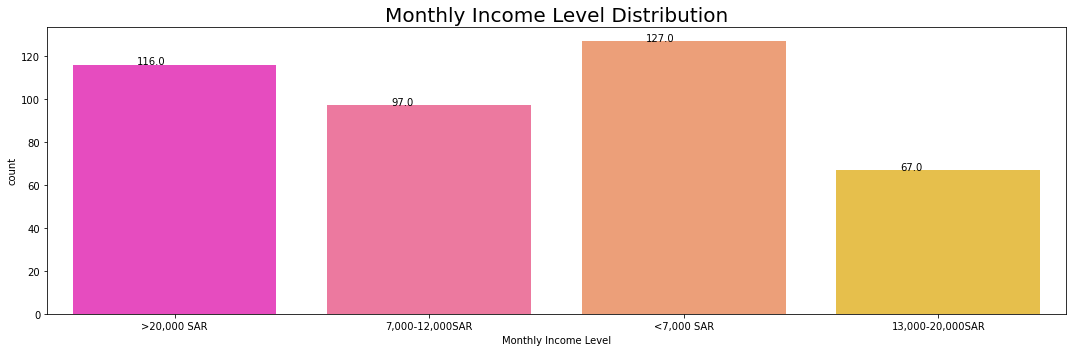

In [17]:
#check Distribution 
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Monthly Income Level',data=df,palette="spring")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Monthly Income Level Distribution', fontsize=20)

plt.show()

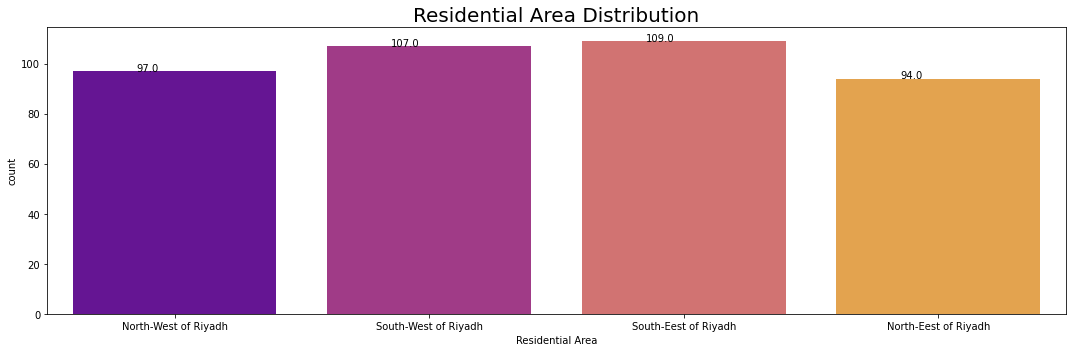

In [18]:
#check Distribution 
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Residential Area',data=df,palette="plasma")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_title('Residential Area Distribution', fontsize=20)

plt.show()

C:\Users\Nextwo\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age to Monthly Income Level for each Gender in Riyad')

<Figure size 1440x1440 with 0 Axes>

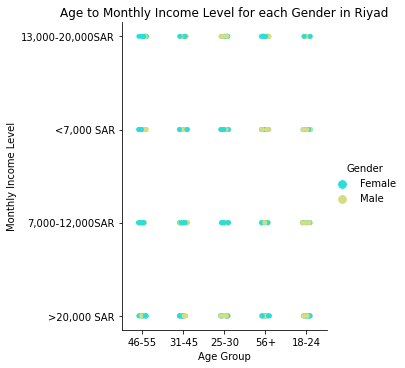

In [19]:
#check Age to Monthly Income Level for each Gender in Riyad
plt.figure(figsize=(20,20)) 
ax=sns.catplot('Age Group', 'Monthly Income Level', hue='Gender', data=df,palette="rainbow")
plt.title('Age to Monthly Income Level for each Gender in Riyad')

C:\Users\Nextwo\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age to Number of going out per week for each Gender in Riyad')

<Figure size 1440x1440 with 0 Axes>

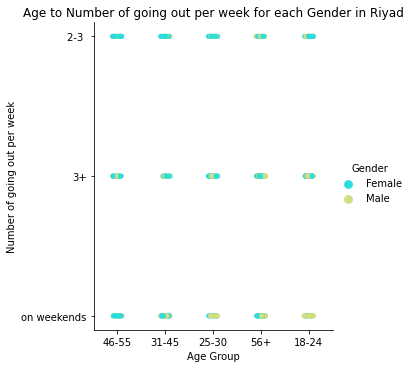

In [20]:
#check Age to Number of going out per week for each Gender in Riyad
plt.figure(figsize=(20,20)) 
ax=sns.catplot('Age Group', 'Number of going out per week', hue='Gender', data=df,palette="rainbow")
plt.title('Age to Number of going out per week for each Gender in Riyad')


C:\Users\Nextwo\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'How much customrs will pay for Entertainment Event according to the Age and Gender')

<Figure size 21600x21600 with 0 Axes>

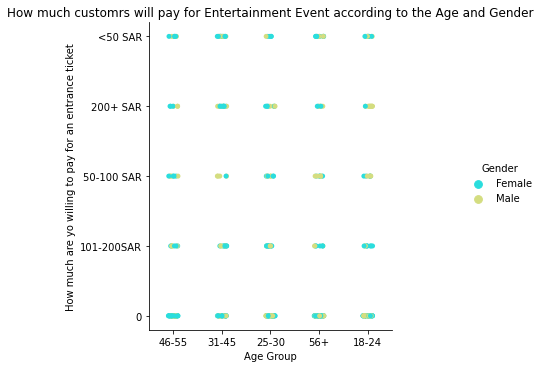

In [21]:
# check How much customrs will pay for Entertainment Event according to the Age and Gender
plt.figure(figsize=(300,300)) 
sns.catplot('Age Group','How much are yo willing to pay for an entrance ticket' ,hue='Gender', data=df,palette="rainbow")
plt.title('How much customrs will pay for Entertainment Event according to the Age and Gender')


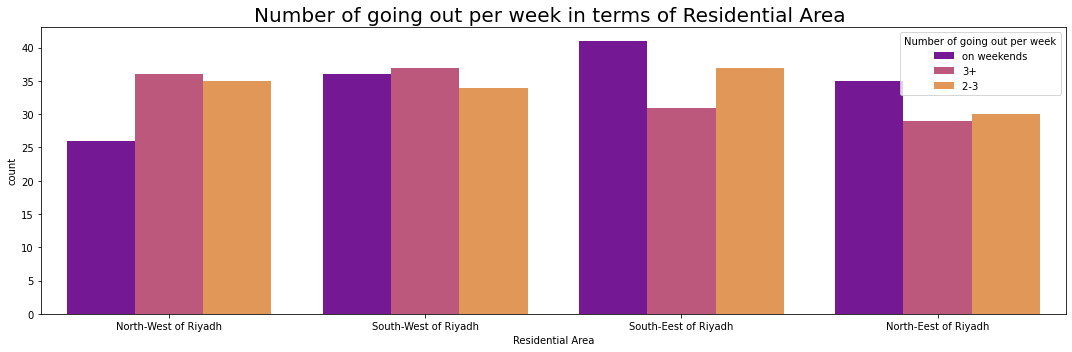

In [22]:
#check Number of going out per week in terms of Residential Area
plt.figure(figsize=(15,5)) 
ax = sns.countplot(x="Residential Area", hue="Number of going out per week", data=df, palette="plasma") 
ax.set_title('Number of going out per week in terms of Residential Area ', fontsize=20)
ax.xaxis.label.set_color('Black')
ax.yaxis.label.set_color('Black')
ax.tick_params(colors='Black', which='both')  # 'both' refers to minor and major axes

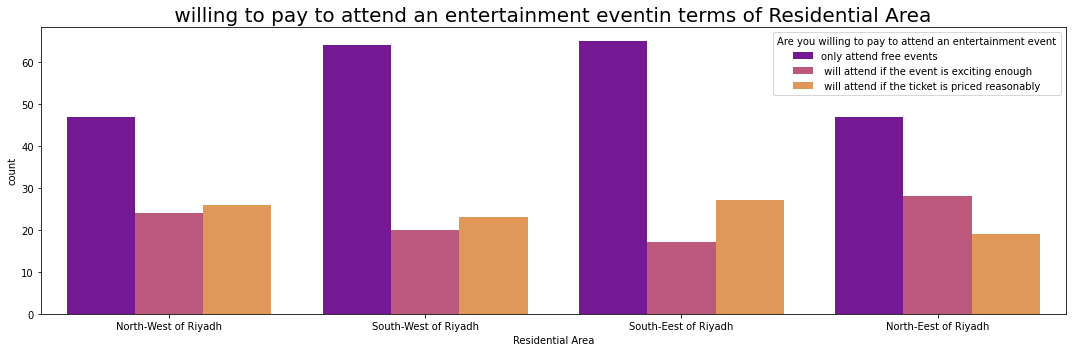

In [23]:
#check  willing to pay to attend an entertainment eventin terms of Residential Area
plt.figure(figsize=(15,5)) 
ax = sns.countplot(x="Residential Area", hue="Are you willing to pay to attend an entertainment event", data=df, palette="plasma") 
ax.set_title(' willing to pay to attend an entertainment eventin terms of Residential Area ', fontsize=20)
ax.xaxis.label.set_color('Black')
ax.yaxis.label.set_color('Black')
ax.tick_params(colors='Black', which='both')  # 'both' refers to minor and major axes

Text(0.5, 1.0, ' Price of ticket in terms of Residential Area ')

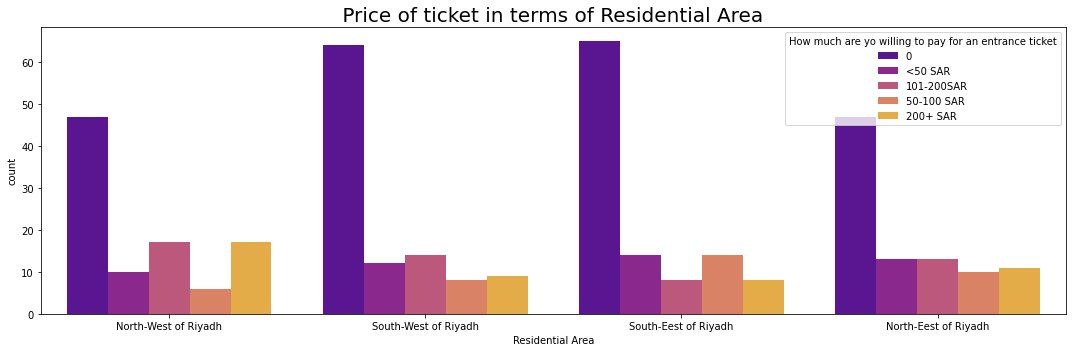

In [24]:
#check Price of ticket in terms of Residential Area
plt.figure(figsize=(15,5)) 
ax = sns.countplot(x="Residential Area", hue="How much are yo willing to pay for an entrance ticket", data=df, palette="plasma") 
ax.set_title(' Price of ticket in terms of Residential Area ', fontsize=20)

C:\Users\Nextwo\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers Satisfaction regarding the Age and Gender')

<Figure size 21600x21600 with 0 Axes>

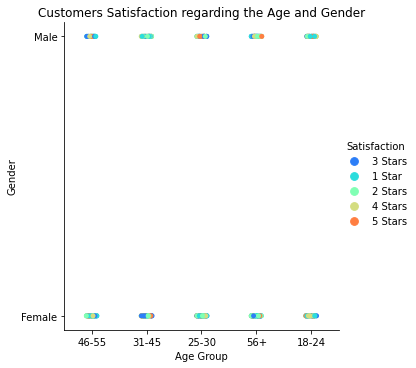

In [25]:
# Behavior Analysis 
plt.figure(figsize=(300,300)) 
sns.catplot('Age Group','Gender' ,hue='Satisfaction', data=df,palette="rainbow")
plt.title('Customers Satisfaction regarding the Age and Gender')

C:\Users\Nextwo\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers Satisfaction ragarding Age Group and Martial Status ')

<Figure size 21600x21600 with 0 Axes>

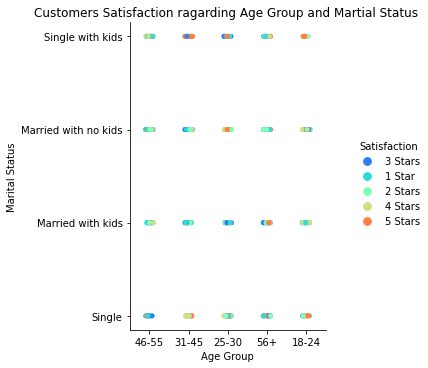

In [26]:
# Behavior Analysis 
plt.figure(figsize=(300,300)) 
sns.catplot('Age Group','Marital Status' ,hue='Satisfaction', data=df,palette="rainbow")
plt.title('Customers Satisfaction ragarding Age Group and Martial Status ')

C:\Users\Nextwo\anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'How Satisfaction Effects Numper of Going out per week and the price willing to pay')

<Figure size 64800x64800 with 0 Axes>

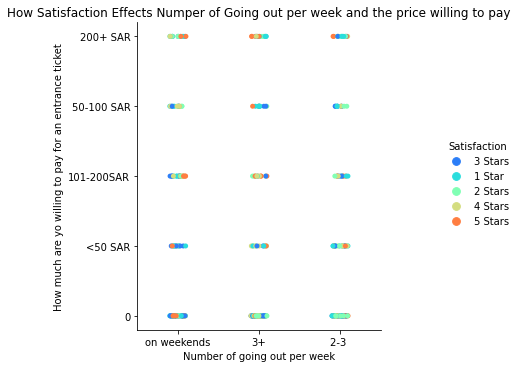

In [29]:
# Behavior Analysis 
plt.figure(figsize=(900,900)) 
sns.catplot("Number of going out per week","How much are yo willing to pay for an entrance ticket",hue='Satisfaction', data=df,palette="rainbow")
plt.title('How Satisfaction Effects Numper of Going out per week and the price willing to pay')